In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None) # to display the total number columns present in the dataset

In [2]:
ds = pd.read_csv('train.csv')

In [3]:
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Important
The identification of rare labels should be done using only the training set, and then propagated to the test set. In practice, what we will do is identify non-rare labels, and then any other label, either in the train or the test or future live data that is not in that list of non-rare labels, will be re-grouped into the new category.

For example, let's imagine that we have in the training set the variable 'city' with the labels 'London', 'Manchester' and 'Yorkshire'. 'Yorkshire' is present in less than 5% of the observations so we decide to re-group it in a new category called 'Rare'.

In the test set, we should also replace 'Yorkshire' by 'Rare', regardless of the percentage of observations for 'Yorkshire' in the test set. In addition, if in the test set we find the category 'Milton Keynes', that was not present in the training set, we should also replace that category by 'Rare'. On other words, all categories present in test set, not present in the list of non-rare categories derived from the training set, should be treated as rare values and re-grouped into 'Rare'.

In [4]:
# Splitting the train and test set
X_train, X_test, y_train, y_test = train_test_split(
    ds.drop(labels=['SalePrice'], axis=1), # predictors
    ds.SalePrice, # target
    test_size=0.3,
    random_state=0)

# let's check the shape of train and test set
X_train.shape, X_test.shape

((1022, 80), (438, 80))

#### Variable with one dominant category

In [6]:
# let's see some examples in which the features have only few categories(less than 3)
for col in X_train.columns:    
    if X_train[col].dtypes == 'O':  
        if X_train[col].nunique() < 3:
            # print percentage of observations per category
            print(X_train.groupby(col)[col].count() / len(X_train))
            print("\n")

Street
Grvl    0.004892
Pave    0.995108
Name: Street, dtype: float64


Alley
Grvl    0.029354
Pave    0.031311
Name: Alley, dtype: float64


Utilities
AllPub    0.999022
NoSeWa    0.000978
Name: Utilities, dtype: float64


CentralAir
N    0.068493
Y    0.931507
Name: CentralAir, dtype: float64


PoolQC
Ex    0.000978
Gd    0.001957
Name: PoolQC, dtype: float64




The 3 variables above, Street, Utilities and CentralAir, show one dominating category which accounts for more than 93-99% of the observations. Re-grouping the rare label in this situation does not make any sense. We could determine if these variables are useful with exploratory analysis, or any feature selection algorithm, or drop the variables altogether.

### Variables with few categories

In [9]:
cols = ['MasVnrType', 'ExterQual', 'BsmtCond']
# these columns have only 4 different labels

for col in cols:
    print(X_train.groupby(col)[col].count() / len(X_train)) 
    print("\n")

MasVnrType
BrkCmn     0.009785
BrkFace    0.294521
None       0.595890
Stone      0.094912
Name: MasVnrType, dtype: float64


ExterQual
Ex    0.029354
Fa    0.011742
Gd    0.332681
TA    0.626223
Name: ExterQual, dtype: float64


BsmtCond
Fa    0.032290
Gd    0.045010
Po    0.001957
TA    0.897260
Name: BsmtCond, dtype: float64




The variables above have only 4 categories, and in all three cases, there is at least one category that is infrequent, that is, that is present in less than 5% of the observations.

When the variable has only a few categories, then perhaps it makes no sense to re-categorise the rare labels into something else.

For example the first variable MasVnrType shows only 1 rare label, BrkCmn. Thus, re-categorising it into a new label will leave the variable in the same situation.

The second variable ExterQual, contains 2 rare labels Ex and Fa, we could group these 2 into a new label called 'Rare'.

The third variable BsmtCond contains 3 rare labels, Fa, Gd and Po, so we could group these 3 under the new label 'Rare'.

### Variable with high Cardinality

In [10]:
# let's see some examples in which the features have several categories
multi_cat_cols = []
for col in X_train.columns:

    if X_train[col].dtypes =='O': 
        if X_train[col].nunique() > 10:     
            multi_cat_cols.append(col)      
            print(X_train.groupby(col)[col].count()/ len(X_train)) 
            print("\n")

Neighborhood
Blmngtn    0.011742
Blueste    0.001957
BrDale     0.009785
BrkSide    0.040117
ClearCr    0.023483
CollgCr    0.102740
Crawfor    0.034247
Edwards    0.069472
Gilbert    0.053816
IDOTRR     0.023483
MeadowV    0.011742
Mitchel    0.035225
NAmes      0.147750
NPkVill    0.006849
NWAmes     0.049902
NoRidge    0.029354
NridgHt    0.049902
OldTown    0.071429
SWISU      0.017613
Sawyer     0.059687
SawyerW    0.044031
Somerst    0.054795
StoneBr    0.015656
Timber     0.029354
Veenker    0.005871
Name: Neighborhood, dtype: float64


Exterior1st
AsbShng    0.014677
AsphShn    0.000978
BrkComm    0.000978
BrkFace    0.034247
CBlock     0.000978
CemntBd    0.038160
HdBoard    0.149706
ImStucc    0.000978
MetalSd    0.135029
Plywood    0.084149
Stone      0.001957
Stucco     0.016634
VinylSd    0.356164
Wd Sdng    0.144814
WdShing    0.020548
Name: Exterior1st, dtype: float64


Exterior2nd
AsbShng    0.016634
AsphShn    0.000978
Brk Cmn    0.003914
BrkFace    0.017613
CBlock    

We can see that many categories are rare in the 3 categorical variables printed above.

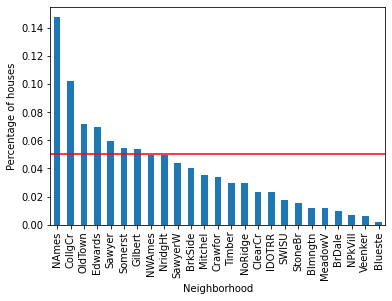

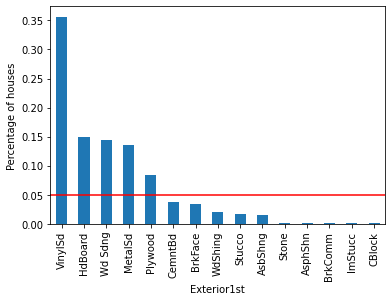

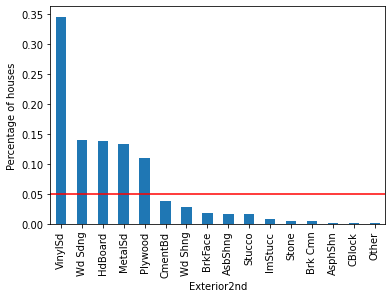

In [11]:
# lets plot the graph for this categorical column having high cardinality
for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    temp_df = pd.Series(X_train[col].value_counts() / len(X_train) )

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

### Re-grouping rare labels with pandas

In [12]:
def func_find_non_rare_labels(ds, col_name, threshold):
    temp = ds.groupby([col_name])[col_name].count() / len(ds)
    non_rare = [x for x in temp.loc[temp>threshold].index.values]
    return non_rare

In [13]:
# non rare labels
func_find_non_rare_labels(X_train, 'Neighborhood', 0.05)

['CollgCr', 'Edwards', 'Gilbert', 'NAmes', 'OldTown', 'Sawyer', 'Somerst']

In [14]:
# rare labels

[x for x in X_train['Neighborhood'].unique(
) if x not in func_find_non_rare_labels(X_train, 'Neighborhood', 0.05)]

['ClearCr',
 'BrkSide',
 'SWISU',
 'Crawfor',
 'Mitchel',
 'Timber',
 'MeadowV',
 'BrDale',
 'NWAmes',
 'NridgHt',
 'SawyerW',
 'NoRidge',
 'IDOTRR',
 'NPkVill',
 'StoneBr',
 'Blmngtn',
 'Veenker',
 'Blueste']

In [15]:
def func_rare_encoding(X_train, X_test, col_name, threshold):
    X_train = X_train.copy()
    X_test = X_test.copy()

    # find the most frequent category
    frequent_cat = func_find_non_rare_labels(X_train, col_name, threshold)

    # re-group rare labels
    X_train[col_name] = np.where(X_train[col_name].isin(
        frequent_cat), X_train[col_name], 'Rare')
    
    X_test[col_name] = np.where(X_test[col_name].isin(
        frequent_cat), X_test[col_name], 'Rare')

    return X_train, X_test

In [16]:
# lets loop through the columns and perform the encoding
for column in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    X_train, X_test = func_rare_encoding(X_train, X_test, column, 0.05)

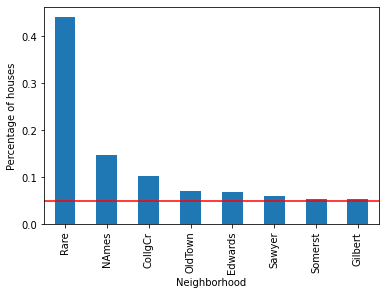

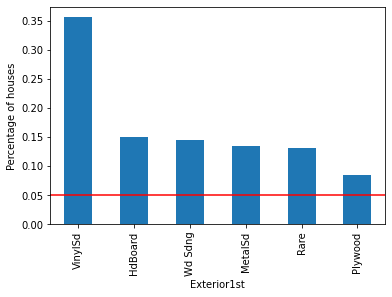

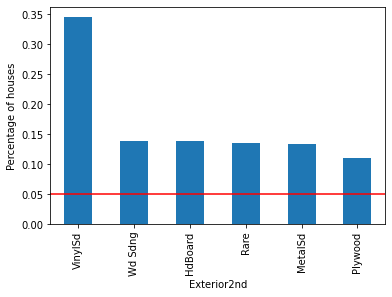

In [17]:
# let's take a look at the plot
for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:

    temp_df = pd.Series(X_train[col].value_counts() / len(X_train) )

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

**And now let's encode the low cardinal variables.**

In [18]:
# looping throguh the lower cardinal variables and then encoding
for variable in ['MasVnrType', 'ExterQual', 'BsmtCond']:
    
    X_train, X_test = func_rare_encoding(X_train, X_test, variable, 0.05)

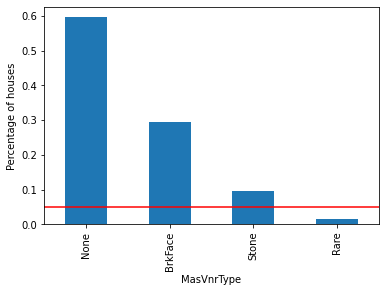

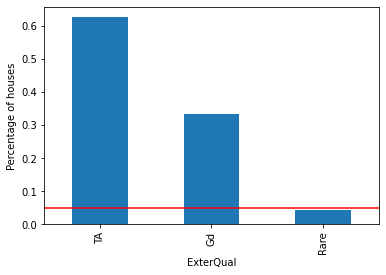

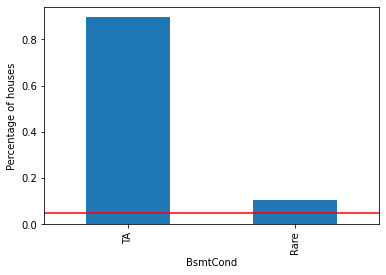

In [19]:
# observe te plot
for col in ['MasVnrType', 'ExterQual', 'BsmtCond']:

    temp_df = pd.Series(X_train[col].value_counts() / len(X_train) )

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()
    